In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((25000,), (25000,), (25000,), (25000,))

In [3]:
print(y_train[50], x_train[50])

0 [1, 13, 165, 219, 14, 20, 33, 6, 750, 17, 515, 17, 13, 2675, 4, 2, 61, 278, 59, 301, 107, 715, 13, 69, 115, 557, 33, 6, 750, 159, 42, 237, 57, 2, 17, 515, 17, 13, 557, 148, 715, 13, 144, 28, 43, 2, 5458, 5458, 8, 61, 2208, 5, 825, 344, 21, 57, 2, 13, 435, 11, 5, 296, 4, 20, 14, 20, 161, 97, 259, 11, 4, 750, 462, 24, 60, 280, 24, 60, 2, 669, 75, 1829, 50, 11, 5023, 3542, 175, 747, 234, 42, 38, 294, 62, 7799, 14, 20, 1870, 4, 311, 62, 6144, 2, 95, 870, 50, 11, 5023, 1100, 3542, 18, 160, 747, 234]


In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(113, 486, 160)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [6]:
import numpy as np

In [7]:
np.unique(y_train).shape, np.unique(y_train)

((2,), array([0, 1]))

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Embedding(input_dim = 10000, output_dim = 24, input_length = 500)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten())       # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax'))       # output layer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc']) # gadget

In [10]:
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/100
69/69 [==============================] - 48s 649ms/step - loss: 2.7195 - acc: 0.4934 - val_loss: 1.5039 - val_acc: 0.4933
Epoch 2/100
69/69 [==============================] - 44s 633ms/step - loss: 1.1169 - acc: 0.5029 - val_loss: 0.9121 - val_acc: 0.4933
Epoch 3/100
69/69 [==============================] - 44s 633ms/step - loss: 0.8418 - acc: 0.5029 - val_loss: 0.7963 - val_acc: 0.4933
Epoch 4/100
69/69 [==============================] - 44s 636ms/step - loss: 0.7732 - acc: 0.5029 - val_loss: 0.7561 - val_acc: 0.4933
Epoch 5/100
69/69 [==============================] - 44s 634ms/step - loss: 0.7452 - acc: 0.5029 - val_loss: 0.7366 - val_acc: 0.4933
Epoch 6/100
69/69 [==============================] - 44s 635ms/step - loss: 0.7304 - acc: 0.5002 - val_loss: 0.7260 - val_acc: 0.4933
Epoch 7/100
69/69 [==============================] - 44s 637ms/step - loss: 0.7215 - acc: 0.5029 - val_loss: 0.7182 - val_acc: 0.4933
Epoch 8/100
69/69 [==============================] - 44s 636ms

In [11]:
model.evaluate(pad_x_train, y_train)

782/782 [==============================] - 42s 54ms/step - loss: 0.1753 - acc: 0.9479


[0.1753404289484024, 0.947920024394989]

In [12]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [13]:
pad_make_x = pad_make(x_test)

In [14]:
model.evaluate(pad_make_x, y_test)

782/782 [==============================] - 42s 54ms/step - loss: 0.4224 - acc: 0.8637


[0.42238956689834595, 0.8637199997901917]

In [15]:
import matplotlib.pyplot as plt

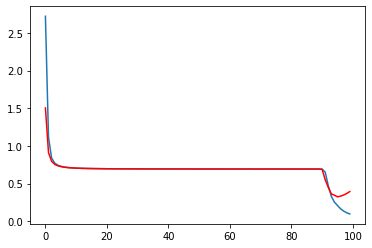

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'r-')
plt.show()

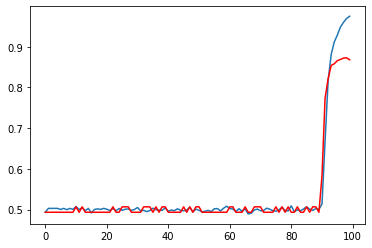

In [17]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

In [23]:
from sklearn.metrics import classification_report

In [18]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([1.71657894e-02, 9.82825339e-01, 1.31627772e-07, 2.49782289e-07,
       4.46532738e-07, 4.67062108e-07, 2.22126204e-07, 7.32262606e-08,
       1.47076278e-07, 1.52497933e-07, 1.12172216e-07, 3.49770346e-07,
       1.78245301e-07, 1.76388227e-07, 5.71223993e-08, 5.32632285e-08,
       9.57426991e-08, 1.78699750e-07, 1.94565132e-07, 6.63555056e-07,
       2.61031687e-07, 1.63520284e-07, 1.22285130e-07, 2.64360665e-07,
       2.24252560e-07, 3.82416403e-07, 2.98080806e-07, 1.60133936e-07,
       1.55094085e-07, 2.59510642e-07, 1.59506428e-07, 1.13017073e-07,
       1.36280690e-07, 3.26752968e-07, 3.37103387e-07, 1.85629858e-07,
       9.94653604e-08, 6.80146144e-08, 1.38548288e-07, 3.88156991e-08,
       7.01285430e-08, 1.39273197e-07, 1.28676504e-07, 1.46809469e-07,
       2.11623075e-07, 2.36002904e-07], dtype=float32)

In [19]:
import numpy as np

In [20]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(25000,)

In [21]:
len(y_train)

25000

In [24]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     12500
           1       0.95      0.95      0.95     12500

    accuracy                           0.95     25000
   macro avg       0.95      0.95      0.95     25000
weighted avg       0.95      0.95      0.95     25000



In [26]:
y_test_pred = model.predict(pad_make_x)

In [27]:
y_pred = np.argmax(y_test_pred, axis=1)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [ ]:
model.evaluate(pad_x_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00


[0.0, 0.0]